# Data Science & Business Analytics Task-1


### Topic: PREDICTION USING SUPERVISED LEARNING
### Author : Dhruv Dodia
### TASK 1:Predict the percentage of a student based on the number of study hours


# Step:1 --- Importing all libraries required in this notebook


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step:2--- Reading data from csv file and visualization


In [5]:
data = pd.read_csv("http://bit.ly/w-data")

In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step:3--- Data Visualization



Text(0, 0.5, 'Percentage score')

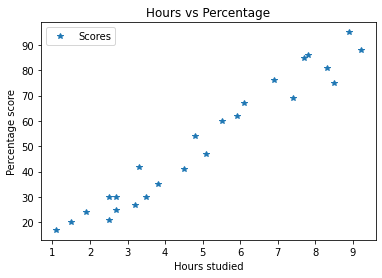

In [9]:
data.plot(x="Hours", y="Scores", style="*")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")

# Step:4 --- Preparing the data

In [10]:
# Independent variable 
# Input = Hours
x = data.drop(['Scores'], axis = 1)
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [11]:
# Dependent variable
# Output = Scores
y = data.drop(['Hours'], axis = 1)
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

# Step:5 --- Training the algorithm

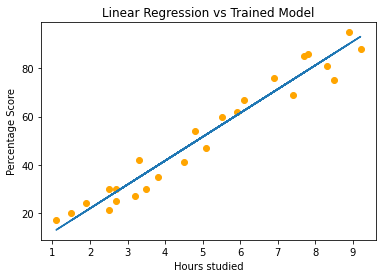

In [13]:
lr = LinearRegression()  
lr.fit(x_train, y_train)

line = lr.coef_ * x + lr.intercept_

plt.title("Linear Regression vs Trained Model")
plt.scatter(x, y, color='orange')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.plot(x,line);

#Step:6 ---Prediction

In [14]:
print(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [15]:
y_pred = lr.predict(x_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [16]:
y_test = y_test.values


In [17]:
# df = pd.DataFrame([{'Actual': list(y_test), 'Predicted': list(y_pred)}])
# df

In [18]:
# Actual VS Predicted
list(zip(y_test,y_pred))

[(array([20], dtype=int64), array([16.88414476])),
 (array([27], dtype=int64), array([33.73226078])),
 (array([69], dtype=int64), array([75.357018])),
 (array([30], dtype=int64), array([26.79480124])),
 (array([62], dtype=int64), array([60.49103328]))]

# Step:7 ---Solution

In [19]:
hour =[9.25]
pred=lr.predict([hour])

print("No of Hours = {}".format(hour))
print("Predicted Score = {:.2f}".format(pred[0][0]))

No of Hours = [9.25]
Predicted Score = 93.69


In [20]:
hours = 9.25
pred2=np.array([hours])
print(pred2)
pred2=pred2.reshape(-1,1)
print(pred)
pred2 = lr.predict([[9.5]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {:.2f}".format(pred2[0][0]))

[9.25]
[[93.69173249]]
No of Hours = 9.25
Predicted Score = 96.17


In [21]:
hours = 9.25
pred2=np.array([hours])
print(pred2)

pred2 = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {:.2f}".format(pred2[0][0]))

[9.25]
No of Hours = 9.25
Predicted Score = 93.69


# Step:8 ---Evaluating the model

In [22]:
from sklearn import metrics

In [23]:
print('Mean absolute error : ', metrics.mean_absolute_error(y_test, y_pred))

print('\nMean squared error : ', metrics.mean_absolute_error(y_test, y_pred))

print('\nRoot mean squared error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))



Mean absolute error :  4.183859899002975

Mean squared error :  4.183859899002975

Root mean squared error :  2.0454485813637495


In [24]:
print("Slope of Regression Line : ",lr.coef_[0][0])
print("\nY-intercept Of Regression Line : ",lr.intercept_[0])


Slope of Regression Line :  9.910656480642237

Y-intercept Of Regression Line :  2.018160041434683
